### 0.1. Setup

In [1]:
%pip install numpy pandas matplotlib 

  Using cached numpy-2.4.1-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached pandas-3.0.0-cp314-cp314-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (79 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.4.1-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Load and Prepare the Dataset

In [3]:
dt = pd.read_csv("Heart_Disease_Prediction.csv")
dt.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## Mapping Heart Disease to (0,1)

In [4]:
df  = dt.replace({"Presence":1, "Absence":0})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## Exploratory Data Analysis (EDA)

Using pandas we can make a general summary of the statistics, knowing the number of people who have heart disease or not.

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), object(1)
m

This function show us a summary to check how many possible null values it might find in the dataset.

When we downloaded it from Kaggle, there were a total of 270, so we can see that there are no null values.

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Pandas, through the **describe** function, allow us to create a summary that shows important characteristics such as the overall average of a column, the minimum, 25%, 50%, 75% and the maximum.

This can give us an indication or some clues about characteristics that may influence the outcome. An example of this could be **ST depression**; if it obtains considerably high values, it can signify **myocardial damage** and in some case may be the only early indication of an acute myocardial infarction.

In [14]:
df.groupby(['Sex']).Age.count()

Sex
0     87
1    183
Name: Age, dtype: int64

We can obtain the distribution of the number of Women (0) and Men (1)


Similarly, using matplot we can see a frequency histogram to look at the number of people with heart disease.

In [17]:
df.groupby(['Heart Disease']).Age.count()

Heart Disease
0    150
1    120
Name: Age, dtype: int64

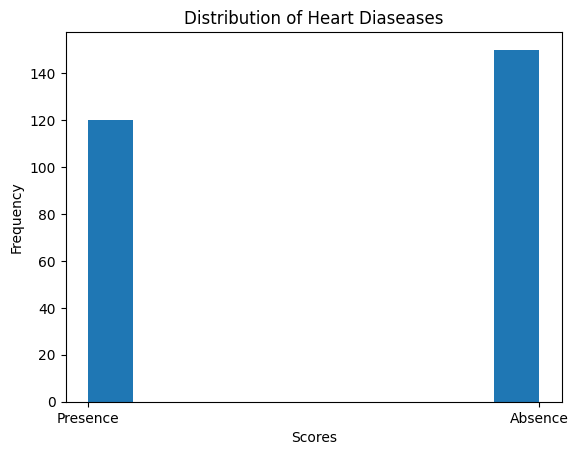

In [ ]:
plt.hist(dt["Heart Disease"])
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Heart Diaseases")
plt.show()

### Handle Outliers

Given How the Dataset was defined in Kaggle, only outliers associated with 3 columns will be reviewed: "Cholesterol", "BP", and "Max Hr". 

The other columns mostly handle normal values or only 0 and 1.

Pacientes con colesterol extremo: 5


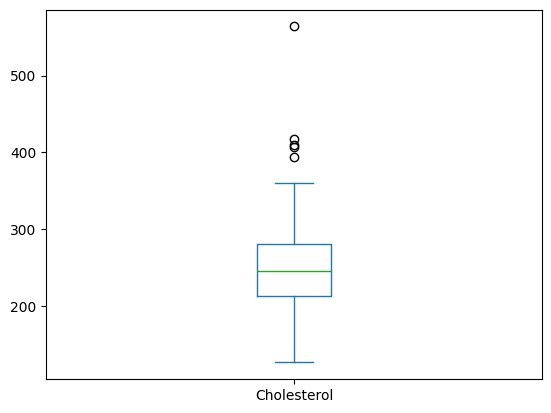

In [ ]:
df["Cholesterol"].plot(kind='box')

Using a whisker box, outliers can be identified; these exceed the upper limite, and upon review, we realize there are only 5. 

They will not be deleted because they can influence and help the model determine when a patient has a higher chance of suffereing from heart disease.

<Axes: >

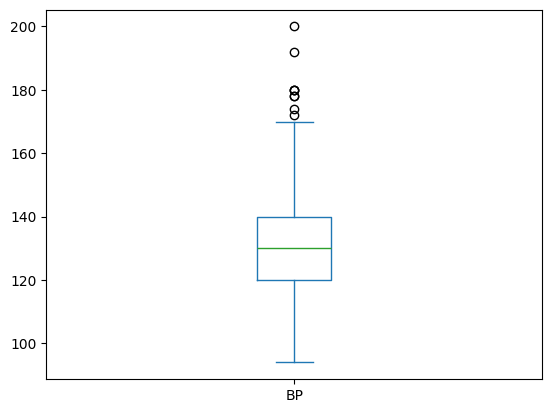

In [28]:
df["BP"].plot(kind='box')

In this case, we observed **blood presuare** values that exceed the upper limit, but which can be of great importance because it is possible that a seriously ill patient could reach this pressuare level.

<Axes: >

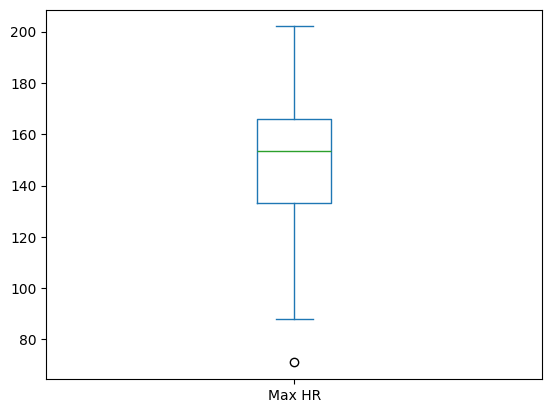

In [30]:
df["Max HR"].plot(kind='box')

This feature allows us to see the maximum frequency capacity that the heart has when it is under stress.

We can see a data point that is below the lower limit; this may indicate the serverity of the patient's condition.

### Preparation

The dataset was then split into two parts: 70% for the training phase and 30% for the evaluation phase. More than six features were selected and normalized to minimize the influence of each feature on the results.


In [32]:
#Dataset with >= 6 features

final_dataset = df[["Age", "Sex", "Cholesterol", "BP", "Max HR","ST depression", "Number of vessels fluro", "Heart Disease"]]

final_dataset = final_dataset.sample(frac=1, random_state=42)

final_dataset = final_dataset.reset_index(drop=True)

train_size = 0.7
test_size = 0.3

total_rows = len(final_dataset)
train_end = int(total_rows * train_size)

train_dataset = final_dataset.iloc[:train_end]
test_dataset = final_dataset.iloc[train_end:]

print(f"Total rows: {total_rows}")
print(f"Train set size: {len(train_dataset)} ({len(train_dataset)/total_rows:.2%})")
print(f"Test set size: {len(test_dataset)} ({len(test_dataset)/total_rows:.2%})")


Total rows: 270
Train set size: 189 (70.00%)
Test set size: 81 (30.00%)


## Step 2: Implement Basic Logistic Regression

### Sigmoid